## Exercise: DNN - Boston data

Conduct the DNN analysis using the boston dataset.

In [ ]:
# loading the dataset

from keras.datasets import boston_housing
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [ ]:
# print the shapes of the dataset

print ("X_train shape", X_train.shape)
print ("y_train shape", y_train.shape)
print ("X_test shape", X_test.shape)
print ("y_test shape", y_test.shape)

X_train shape (404, 13)
y_train shape (404,)
X_test shape (102, 13)
y_test shape (102,)


In [ ]:
# Normalization - preferred since the feature variables have different units
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# calculate mean and standard deviation 
X_train = scaler.fit_transform(X_train)
# use the values calculated above
X_test = scaler.transform(X_test)

In [ ]:
# keras imports for the dataset and building our neural network

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import initializers
from keras import regularizers
from keras.callbacks import EarlyStopping

In [ ]:
# building a linear stack of layers with the sequential model

L1 = 100
L2 = 100
L3 = 100

model = Sequential()
model.add(Dense(L1, input_dim = 13, activation = 'relu'))
model.add(Dense(L2, activation = 'relu'))
model.add(Dense(L3, activation = 'relu'))

# output layer 
model.add(Dense(10, activation = 'linear')) # linear for continuous target variable

In [ ]:
# compiling the sequential model
model.compile(loss='mse',
              metrics=['mae'], optimizer='adam')

In [ ]:
# training the model for 10 epoch
history = model.fit(X_train,y_train, epochs=10,
                    batch_size=100, validation_data=(X_test, y_test))

Epoch 1/10
5/5 [==============================] - 1s 43ms/step - loss: 575.9279 - mae: 22.1782 - val_loss: 593.0346 - val_mae: 22.5927
Epoch 2/10
5/5 [==============================] - 0s 14ms/step - loss: 558.5322 - mae: 21.7890 - val_loss: 568.8363 - val_mae: 22.0647
Epoch 3/10
5/5 [==============================] - 0s 10ms/step - loss: 532.3248 - mae: 21.1905 - val_loss: 532.1287 - val_mae: 21.2400
Epoch 4/10
5/5 [==============================] - 0s 10ms/step - loss: 492.4483 - mae: 20.2599 - val_loss: 476.3246 - val_mae: 19.9156
Epoch 5/10
5/5 [==============================] - 0s 15ms/step - loss: 432.2922 - mae: 18.7601 - val_loss: 394.3878 - val_mae: 17.8238
Epoch 6/10
5/5 [==============================] - 0s 11ms/step - loss: 346.5558 - mae: 16.4579 - val_loss: 286.8869 - val_mae: 14.8001
Epoch 7/10
5/5 [==============================] - 0s 9ms/step - loss: 242.4244 - mae: 13.2375 - val_loss: 174.0412 - val_mae: 11.1198
Epoch 8/10
5/5 [==============================] - 0s 9ms

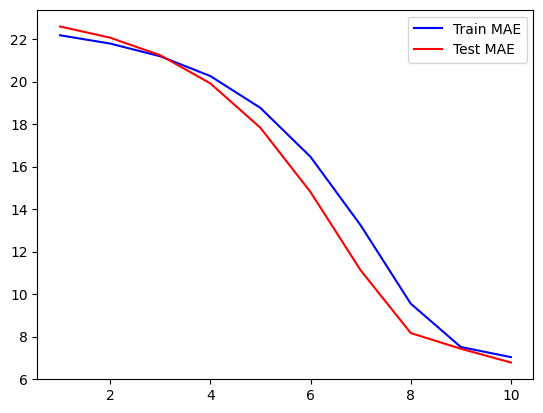

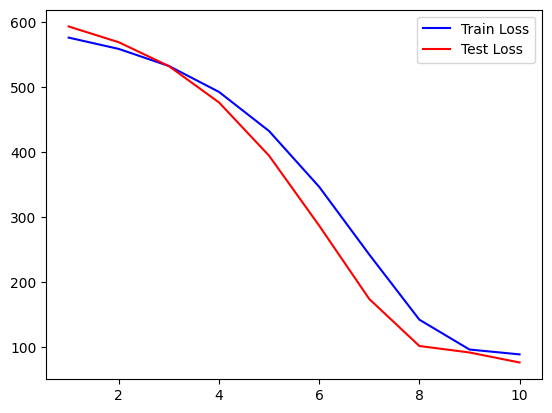

In [ ]:
# visualization

import matplotlib.pyplot as plt

mae2 =history.history['mae']
val_mae = history.history['val_mae']
loss2 = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(mae2)+1)


plt.plot(epochs, mae2,'b',label='Train MAE')
plt.plot(epochs, val_mae,'r',label='Test MAE')
plt.legend()
plt.figure()


plt.plot(epochs, loss2,'b',label='Train Loss')
plt.plot(epochs, val_loss,'r',label='Test Loss')
plt.legend()
plt.show()

Model with initializer and regularizer

Epoch 1/50
5/5 [==============================] - 1s 42ms/step - loss: 581.1664 - mae: 22.2342 - val_loss: 584.9406 - val_mae: 22.3445
Epoch 2/50
5/5 [==============================] - 0s 9ms/step - loss: 544.4142 - mae: 21.3860 - val_loss: 539.4498 - val_mae: 21.2977
Epoch 3/50
5/5 [==============================] - 0s 13ms/step - loss: 496.1597 - mae: 20.2327 - val_loss: 475.3990 - val_mae: 19.7274
Epoch 4/50
5/5 [==============================] - 0s 9ms/step - loss: 428.3215 - mae: 18.4645 - val_loss: 386.3348 - val_mae: 17.3304
Epoch 5/50
5/5 [==============================] - 0s 9ms/step - loss: 334.8414 - mae: 15.8253 - val_loss: 273.7701 - val_mae: 14.0070
Epoch 6/50
5/5 [==============================] - 0s 9ms/step - loss: 226.6752 - mae: 12.3043 - val_loss: 164.2863 - val_mae: 10.3297
Epoch 7/50
5/5 [==============================] - 0s 8ms/step - loss: 135.1848 - mae: 9.0257 - val_loss: 110.6247 - val_mae: 8.1878
Epoch 8/50
5/5 [==============================] - 0s 10ms/step

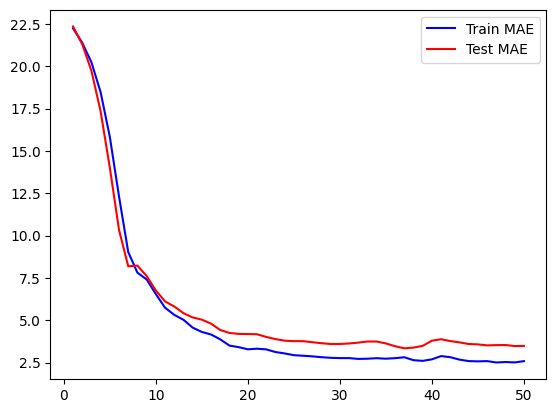

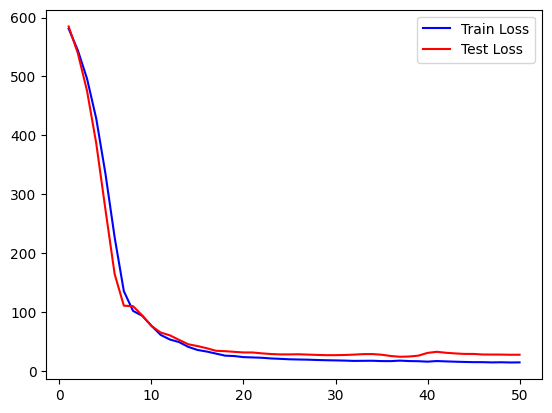

In [ ]:
L1 = 100
L2 = 100
L3 = 100

model = Sequential()
model.add(Dense(L1, input_dim = 13, activation = 'relu', kernel_initializer='he_normal',
                kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(L2, activation = 'relu'))
model.add(Dense(L3, activation = 'relu'))

model.add(Dense(10, activation = 'linear'))

model.compile(loss='mse',
              metrics=['mae'], optimizer='adam')

history = model.fit(X_train,y_train, epochs=50,
                    batch_size=100, validation_data=(X_test, y_test))

import matplotlib.pyplot as plt

mae2 =history.history['mae']
val_mae = history.history['val_mae']
loss2 = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(mae2)+1)


plt.plot(epochs, mae2,'b',label='Train MAE')
plt.plot(epochs, val_mae,'r',label='Test MAE')
plt.legend()
plt.figure()


plt.plot(epochs, loss2,'b',label='Train Loss')
plt.plot(epochs, val_loss,'r',label='Test Loss')
plt.legend()
plt.show()

Model with dropout, initializer and regularizer

Epoch 1/50
5/5 [==============================] - 1s 42ms/step - loss: 580.9031 - mae: 22.1796 - val_loss: 584.8204 - val_mae: 22.2996
Epoch 2/50
5/5 [==============================] - 0s 9ms/step - loss: 543.3954 - mae: 21.2832 - val_loss: 541.1221 - val_mae: 21.2531
Epoch 3/50
5/5 [==============================] - 0s 9ms/step - loss: 495.7542 - mae: 20.1091 - val_loss: 479.5781 - val_mae: 19.7458
Epoch 4/50
5/5 [==============================] - 0s 9ms/step - loss: 431.9858 - mae: 18.4173 - val_loss: 394.9620 - val_mae: 17.6432
Epoch 5/50
5/5 [==============================] - 0s 10ms/step - loss: 343.2731 - mae: 15.9640 - val_loss: 292.9397 - val_mae: 14.8558
Epoch 6/50
5/5 [==============================] - 0s 9ms/step - loss: 255.1792 - mae: 13.3826 - val_loss: 196.0835 - val_mae: 11.7608
Epoch 7/50
5/5 [==============================] - 0s 9ms/step - loss: 178.8392 - mae: 10.7680 - val_loss: 127.0843 - val_mae: 9.1562
Epoch 8/50
5/5 [==============================] - 0s 11ms/ste

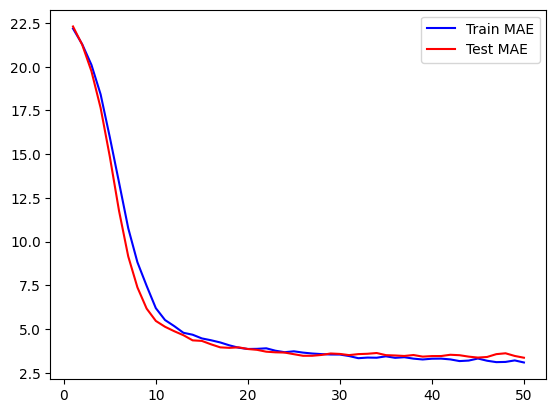

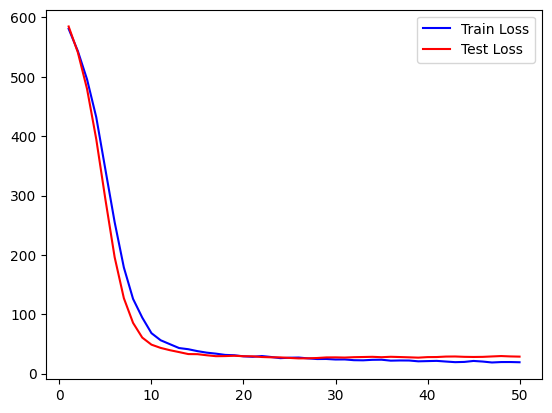

In [ ]:
L1 = 100
L2 = 100
L3 = 100

model = Sequential()
model.add(Dense(L1, input_dim = 13, activation = 'relu', kernel_initializer='he_normal',
                kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(L2, activation = 'relu'))
model.add(Dense(L3, activation = 'relu'))
model.add(Dropout(rate=0.2))

model.add(Dense(10, activation = 'linear'))

model.compile(loss='mse',
              metrics=['mae'], optimizer='adam')

history = model.fit(X_train,y_train, epochs=50,
                    batch_size=100, validation_data=(X_test, y_test))

import matplotlib.pyplot as plt

mae2 =history.history['mae']
val_mae = history.history['val_mae']
loss2 = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(mae2)+1)


plt.plot(epochs, mae2,'b',label='Train MAE')
plt.plot(epochs, val_mae,'r',label='Test MAE')
plt.legend()
plt.figure()


plt.plot(epochs, loss2,'b',label='Train Loss')
plt.plot(epochs, val_loss,'r',label='Test Loss')
plt.legend()
plt.show()

Model with early stopping, dropout, initialiser and regulariser

Epoch 1/30
5/5 [==============================] - 1s 59ms/step - loss: 575.3686 - mae: 22.0959 - val_loss: 578.8976 - val_mae: 22.1895
Epoch 2/30
5/5 [==============================] - 0s 14ms/step - loss: 538.7961 - mae: 21.2088 - val_loss: 534.9905 - val_mae: 21.1542
Epoch 3/30
5/5 [==============================] - 0s 18ms/step - loss: 492.7252 - mae: 20.0409 - val_loss: 474.0784 - val_mae: 19.6302
Epoch 4/30
5/5 [==============================] - 0s 17ms/step - loss: 429.3525 - mae: 18.3541 - val_loss: 387.9480 - val_mae: 17.4026
Epoch 5/30
5/5 [==============================] - 0s 16ms/step - loss: 343.2239 - mae: 16.0348 - val_loss: 281.1281 - val_mae: 14.5066
Epoch 6/30
5/5 [==============================] - 0s 13ms/step - loss: 247.7592 - mae: 13.2488 - val_loss: 180.3792 - val_mae: 11.3118
Epoch 7/30
5/5 [==============================] - 0s 13ms/step - loss: 168.0345 - mae: 10.4639 - val_loss: 120.3196 - val_mae: 8.9585
Epoch 8/30
5/5 [==============================] - 0s 20m

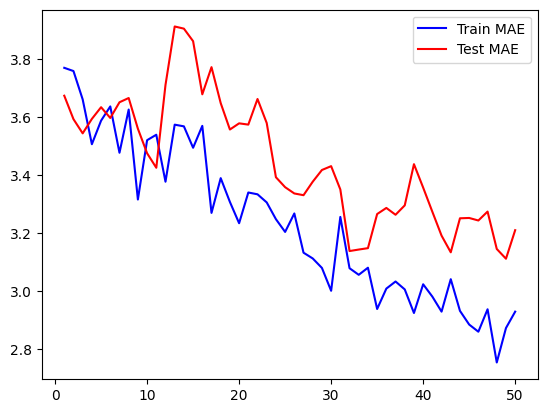

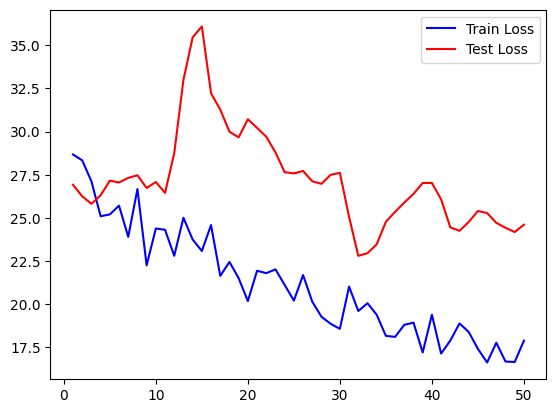

In [ ]:
L1 = 100
L2 = 100
L3 = 100

model = Sequential()
model.add(Dense(L1, input_dim = 13, activation = 'relu', kernel_initializer='he_normal',
                kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(L2, activation = 'relu'))
model.add(Dense(L3, activation = 'relu'))
model.add(Dropout(rate=0.2))

model.add(Dense(10, activation = 'linear'))

model.compile(loss='mse',
              metrics=['mae'], optimizer='adam')

early_stopping_monitor = EarlyStopping(patience = 6)
history = model.fit(X_train, y_train, epochs = 30,
                    batch_size = 100, validation_data = (X_test, y_test),
                    callbacks = [early_stopping_monitor])

history = model.fit(X_train,y_train, epochs=50,
                    batch_size=100, validation_data=(X_test, y_test))

mae2 =history.history['mae']
val_mae = history.history['val_mae']
loss2 = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(mae2)+1)


plt.plot(epochs, mae2,'b',label='Train MAE')
plt.plot(epochs, val_mae,'r',label='Test MAE')
plt.legend()
plt.figure()


plt.plot(epochs, loss2,'b',label='Train Loss')
plt.plot(epochs, val_loss,'r',label='Test Loss')
plt.legend()
plt.show()

Grid search hyperparameters

In [ ]:
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# need to have sklearn model selection to import grid search cross validation
from sklearn.model_selection import GridSearchCV

# also require scikeras.wrappers to import from Keras classifier
from scikeras.wrappers import KerasClassifier
from scikeras.wrappers import KerasRegressor 

In [ ]:
# to create model architecture

def create_model():
  # create model
  # model building, architecture used earlier
  model5 = Sequential()
  model5.add(Dense(100, input_dim = 13, activation='relu'))
  model5.add(Dense(100, activation = 'relu'))
  model5.add(Dense(100, activation = 'relu'))
  model5.add(Dense(1, activation = 'relu'))

  #compile model
  model5.compile(loss='mse',
                 optimizer='adam', metrics=['mae'])
  return model5

In [ ]:
# create model
model5 = KerasRegressor(model = create_model, loss ='mse',
                         verbose = 0) 

# define the grid search parameters
batch_size = [50, 100] 
epochs = [10, 25, 50] 

# calling batch size and epoch (based on iteration here) based on dictionary
param_grid = dict(batch_size=batch_size,
                  epochs=epochs)

grid = GridSearchCV(estimator=model5, 
                    param_grid=param_grid,
                    n_jobs=-1, cv=3)

grid_result = grid.fit(X_train, y_train)

In [ ]:
#summarize result
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.844132 using {'batch_size': 50, 'epochs': 50}
0.545354 (0.096192) with: {'batch_size': 50, 'epochs': 10}
0.802400 (0.048457) with: {'batch_size': 50, 'epochs': 25}
0.844132 (0.036112) with: {'batch_size': 50, 'epochs': 50}
-0.743859 (0.651741) with: {'batch_size': 100, 'epochs': 10}
0.660086 (0.088380) with: {'batch_size': 100, 'epochs': 25}
-2.062169 (4.092560) with: {'batch_size': 100, 'epochs': 50}


In [ ]:
model6 = KerasRegressor(model=create_model,
                         loss='mse',
                         epochs=50, batch_size=128, verbose=0)

# define the grid search parameters
# even though it is updated as adam earlier, it will still try one by one
optimizer = ['SGD', 'RMSProp', 'Adagrad', 'Adadelta',
             'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model6,
                    param_grid=param_grid,
                    n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_,
                             grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.812829 using {'optimizer': 'Adam'}
0.807162 (0.032162) with: {'optimizer': 'SGD'}
0.788602 (0.028742) with: {'optimizer': 'RMSProp'}
0.806150 (0.033842) with: {'optimizer': 'Adagrad'}
0.804521 (0.043846) with: {'optimizer': 'Adadelta'}
0.812829 (0.040483) with: {'optimizer': 'Adam'}
0.787645 (0.044951) with: {'optimizer': 'Adamax'}
0.792612 (0.037545) with: {'optimizer': 'Nadam'}


In [ ]:
#activation function tuning

def create_model(activation='relu'):
  # create model
  model = Sequential()
  model.add(Dense(100, input_dim = 13, activation=activation)) # call from earlier defined activation
  model.add(Dense(100, activation=activation)) # dense to change number of neurons
  model.add(Dense(100, activation=activation))
  model.add(Dense(1, activation='linear'))

# Compile model
  model.compile(loss='mse', optimizer='adam', metrics=['mae'])
  return model

In [ ]:
model8 = KerasRegressor(model=create_model, epochs=10, batch_size=10, verbose=0)
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(model__activation=activation)
grid =  GridSearchCV(estimator=model8, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_,
                             grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.819308 using {'model__activation': 'relu'}
-5.879460 (1.089979) with: {'model__activation': 'softmax'}
0.759004 (0.043879) with: {'model__activation': 'softplus'}
0.359039 (0.082272) with: {'model__activation': 'softsign'}
0.819308 (0.043757) with: {'model__activation': 'relu'}
0.451326 (0.062812) with: {'model__activation': 'tanh'}
-0.326986 (0.118762) with: {'model__activation': 'sigmoid'}
-0.187096 (0.074993) with: {'model__activation': 'hard_sigmoid'}
0.692509 (0.063355) with: {'model__activation': 'linear'}


## **Summary**

- Hyperperameter tuning using dropout, initializer and regularizer improves performance of model in terms of MAE and loss.
- Early stopping does not show improvements.
By using grid search it was demonstrated that the best performance is achieved by using:
- batch size and epoch of 50 respectively
- Adam as optimiser
- ReLU as activation function